# <center><u> CP322: Assignment 1 – Winter 2026 </u> </center>
# <center><u>  Due on January 25, 2026 (Before 11:59 PM) </u> </center>

 This is an individual assignment, and we will practice the concepts to read, clean and explore the dataset, identifying the type of data collected, missing values, anomalies, exploring characteristics of individual variables.

 For this assignment, you must use Python language syntax. You will use this jupyter notebook to write your code without errors. You will be provided with a Makefile and instructions on using it. If your code does not run, then you will score zero. Therefore, ensure you have removed all syntax errors from your code. •	Gradescope platform would be used to upload the assignments for grading. The link to the Gradescope assignment is available on Myls course page.

 For submission, Drag and drop your code file(s) into Gradescope. Make sure that your file name should be as suggested in the assignment, using a different name may score zero.

 - Please note that the submitted code will be checked for plagiarism. By submitting this zip file, you would confirm that you have not received unauthorized assistance in preparing the assignment. You also confirm that you are aware of course policies for submitted work.

 - Marks will be deducted from any questions where these requirements are not met.

 - Multiple attempts will be allowed, but only your last submission before the deadline will be graded. Instructor reserves the right to take off points for not following the directions.

<b>Warning:</b> Follow the assignment instructions to the letter in terms of the file names and function names, as this assignment will be auto-graded. If anything is not as per the description, the auto-grading fails, and your assignment will be given a Zero mark.

Note:
- For each question in the assignment, please write down your answer in the answer cell(s) right below the question.
- It is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run codes, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when autograder run.
- Finally, unless it is stated otherwise, try to avoid using python for loops or list comprehensions.  The majority of this part of assignment can be done using builtin commands in Pandas and numpy.  

## Import the Python Packages

If any of the package is not available then install it.

In [2]:
import numpy as np
rng_seed = 42
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
sns.set(style = "whitegrid",
        color_codes = True,
        font_scale = 1.5)
plt.style.use('fivethirtyeight')
import os # Used to interact with the file system

## Part I: Cleaning and Exploring Data with Pandas
## 1: Loading Data sets

### Question 1: Reading in the Files

Use the following information and let's attempt to load `bus.csv` dataset, into pandas dataframe named `bus`.

URL for loading the business data is:

- "https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/bus.csv"

**Note:** Because of character encoding issue with (`bus`) dataset, it will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. At some point in your future, you should read all about [character encodings](https://diveintopython3.problemsolving.io/strings.html).

In [3]:
bus = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/bus.csv', encoding='ISO-8859-1') # SOLUTION

Now that you've read in the file, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus` dataframe. To show multiple return outputs in one single cell, you can use `display(EXPRESSION)`, change the EXPRESSION variable appropriately with code you want to show result/ouput for.

In [4]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [5]:
bus.shape

(6253, 9)

## 2: Examining the Business Data File

From its name alone, it is expected that the `bus.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

In [6]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


### Question 2a

The `bus` dataframe contains a column called `business id column` which probably corresponds to a unique business id (also called `primary key`).  However, let's first rename that column to `bid`.  Modify the `bus` dataframe by renaming that column to `bid`.

**Note**: In practice, you might want to do this renaming when the table is loaded but for grading purposes so let's do it here.

Hint: Use DATAFRAME.rename(columns={"OLD_NAME": "NEW_NAME"}). Here, replace CAPITAL LETTERS appropriately.

In [7]:
bus = bus.rename(columns={"business id column": "bid"})

### Question 2b

Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.


In [8]:
is_bid_unique = np.bool(bus['bid'].is_unique)
is_bid_unique

True

### Question 2c

In the two cells below create two **series**

a) where the index is the `name` of the business and the value is the number of records with that `name`
b) where the index is the `address` of the business and the value is the number of records with that `address`

Order both series in descending order by count. You may need to use `value_counts()`.

In [9]:
# Part a)
name_counts = bus["name"].value_counts()
name_counts.head(20)

,count
name,
Peet's Coffee & Tea,20
Starbucks Coffee,13
Jamba Juice,10
McDonald's,10
STARBUCKS,9
Proper Food,9
Specialty's Cafe & Bakery,8
Mixt Greens/Mixt,8
The Organic Coup,7


In [10]:
address_counts = bus["address"].value_counts()
address_counts.head(10)

,count
address,
Off The Grid,39
428 11th St,34
3251 20th Ave,17
2948 Folsom St,17
Pier 41,16
103 Horne Ave,14
24 Willie Mays Plaza,13
Off the Grid,11
2948 Folsom St.,10


### Question 2d

Based on the above calculations answer each of the following questions by filling the value in the variable.

1. What does each record represent?  
1. What is the minimal primary key?


In [11]:
# What does each record represent?  Valid answers are:
#    "One location of a restaurant."
#    "A chain of restaurants."
#    "A city block."
q2d_part1 = "One location of a restaurant."

# What is the minimal primary key? Valid answers are:
#    "bid"
#    "bid, name"
#    "bid, name, address"
q2d_part2 = "bid"

## 3: Cleaning the Business Data Postal Codes

The business data contains postal code information that can used to aggregate the ratings over regions of the city.  Let's examine and clean the postal code field.  The postal code (sometimes also called a ZIP code) partitions the city into regions:

<img src="https://usmapguide.com/wp-content/uploads/printable-san-francisco-zip-code-map.jpg" alt="ZIP Code Map" style="width: 600px">

### Question 3a

How many restaurants are in each ZIP code?

In the cell below, create a **series** where the index is the postal code and the value is the number of records with that postal code in descending order of count. You may need to use `groupby()`, `size()`, or `value_counts()`. Do you notice any odd/invalid zip codes?

In [12]:
zip_counts = bus["postal_code"].value_counts()
print(zip_counts.to_string())

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
94109         382
94111         259
94122         255
94105         249
94118         231
94115         230
94108         229
94124         218
94114         200
-9999         194
94112         192
94117         189
94123         177
94121         157
94104         142
94132         132
94116          97
94158          90
94134          82
94127          67
94131          49
94130           8
94143           5
CA              2
94013           2
94101           2
94301           2
94188           2
95105           1
94122-1909      1
94105-1420      1
94518           1
94117-3504      1
941033148       1
94120           1
92672           1
94014           1
94129           1
94602           1
Ca              1
941             1
941102019       1
00000           1
94080           1
64110           1
94544           1
94901           1
95117           1
95133           1
95109           

### Question 3b

Answer the following questions about the `postal_code` column in the `bus` dataframe.

1. The ZIP code column is which of the following type of data:
    1. Quantitative Continuous
    1. Quantitative Discrete
    1. Qualitative Ordinal
    1. Qualitative Nominal    
1. What Python data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

Please write your answers in the variables below:

In [13]:
# The ZIP code column is which of the following type of data:
#   "Quantitative Continuous"
#   "Quantitative Discrete"
#   "Qualitative Ordinal"
#   "Qualitative Nominal"
q3b_part1 = "Qualitative Nominal"

# What Python data type is used to represent a ZIP code?
#    "str"
#    "int"
#    "bool"
#    "float"
q3b_part2 = "str"

### Question 3c

In question 3a, a large number of potentially invalid ZIP codes exist (e.g., "Ca").  These are likely due to data entry errors.  To get a better understanding of the potential errors in the zip codes, do the following:

1. Import a list of valid San Francisco ZIP codes by using `pd.read_json` (from URL = 'https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/sf_zipcodes.json') to load the file `sf_zipcodes.json` and extract a **series** of type `str` containing the valid ZIP codes.  

*Hint: set `dtype` when invoking `read_json`.*

2. Construct a `DataFrame` containing only the businesses which DO NOT have valid ZIP codes.  You will probably want to use the `Series.isin` function.


**Step 1**

In [14]:
valid_zips = pd.read_json(
    "https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/sf_zipcodes.json",
    dtype=str
)["zip_codes"]
valid_zips.head()

,zip_codes
0,94102
1,94103
2,94104
3,94105
4,94107


**Step 2**

In [15]:
invalid_zip_bus = bus[~bus["postal_code"].isin(valid_zips)]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.000000,-9999.000000,-9999
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.000000,-9999.000000,14150429222
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.752581,-122.416482,-9999


### Question 3d

In the previous question, many of the businesses had a common invalid postal code that was likely used to encode a MISSING postal code.  Do they all share a potentially "interesting address"?

In the following cell, construct a **series** that counts the number of businesses at each `address` that have this single likely MISSING postal code value.  Order the series in descending order by count.

After examining the output.  Answer the following question by filling in the appropriate variable. If we were to drop businesses with MISSING postal code values would a particular class of business be affected?  If you are unsure try to search the web for the most common addresses.



In [16]:
missing_zip = invalid_zip_bus["postal_code"].value_counts().idxmax()

missing_zip_address_count = (
    bus.loc[bus["postal_code"] == missing_zip, "address"]
    .value_counts()
)
missing_zip_address_count.head()


,count
address,
Off The Grid,39
Off the Grid,10
OTG,4
Approved Private Locations,3
Approved Locations,3


### Question 3e

**True or False**:  *If we were to drop businesses with MISSING postal code values, a particular class of business will be affected.*


In [17]:
# True or False:
#  If we were to drop businesses with MISSING postal code values
#   a particular class of business be affected.
q3d_true_or_false = True


### Question 3f

Examine the `invalid_zip_bus` dataframe we computed above and look at the businesses that DO NOT have the special MISSING ZIP code value.  Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits.  Create a new column named `postal5` in the original `bus` dataframe which contains only the first 5 digits of the `postal_code` column.   Finally, for any of the `postal5` ZIP code entries that were not a valid San Fransisco ZIP Code (according to `valid_zips`) set the entry to `None`.

In [18]:
bus["postal5"] = bus["postal_code"].astype(str).str[:5]
bus.loc[~bus["postal5"].isin(valid_zips), "postal5"] = None

# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


## Part II: Linear Regression
In this part of the assignment, you will use what you've learned in class to fit a regression model. The ``LinearRegression`` estimator is much more capable to handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize. We can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

### Loading the data



In the English Premier League,  May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. An important part of negotiations is predicting the fair market price for a player. You are tasked with predicting this Market Value of a player using the data provided below

The attached data set consists of the following attributes:

*  name: Name of the player
*  club: Club of the player
*  age : Age of the player
*  position : The usual position on the pitch
*  position_cat: 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers
*  market_value : As on transfermrkt.com on July 20th, 2017
*  page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
*  fpl_value : Value in Fantasy Premier League as on July 20th, 2017
*  fpl_sel : % of FPL players who have selected that player in their team
*  fpl_points : FPL points accumulated over the previous season
*  region: 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World
*  nationality
*  new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
*  age_cat
*  club_id
*  big_club: Whether one of the Top 6 clubs
*  new_signing: Whether a new signing for 2017/18 (till 20th July)


In [19]:
football = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/football.csv')
football.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


### Question 4
Drop columns named `'name','fpl_sel','position','nationality','region','new_foreign'` from `football` dataframe.

<!-- BEGIN QUESTION -->



In [20]:
football = football.drop(columns=["name","fpl_sel","position","nationality","region","new_foreign"])
football.head()

,club,age,position_cat,market_value,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing
0,Arsenal,28,1,65.0,4329,12.0,264,4,1,1,0
1,Arsenal,28,1,50.0,4395,9.5,167,4,1,1,0
2,Arsenal,35,4,7.0,1529,5.5,134,6,1,1,0
3,Arsenal,28,1,20.0,2393,7.5,122,4,1,1,0
4,Arsenal,31,3,22.0,912,6.0,121,4,1,1,0


<!-- END QUESTION -->

Let's look at the shape of the updated football data.

In [21]:
print('Shape of Data: ', football.shape)
print('data.describe:')
football.describe()

Shape of Data:  (461, 11)
data.describe:


,age,position_cat,market_value,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,6.000000,20.000000,1.000000,1.000000


### Question 5
Define the function `correlation` which computes the correlation of dataframe variables and returns the result.

In [22]:
def correlation(dataframe):
    return dataframe.select_dtypes(include="number").corr()

### Question 6
Let's do some visualization to:

a) Find the correlation between variables of `football` dataset using `correlation` function defined above, to create a heatmap.

b) Create a barplot of `age` vs `market_value`.

c) Create a barplot of `position_cat` vs `market_value`.

d) Create a barplot of `big_club` vs `market_value`.

e) Create a barplot of `club` vs `market_value`.

f) Create a scatterplot of `page_views` vs `market_value`.

<!-- BEGIN QUESTION -->



<Axes: >

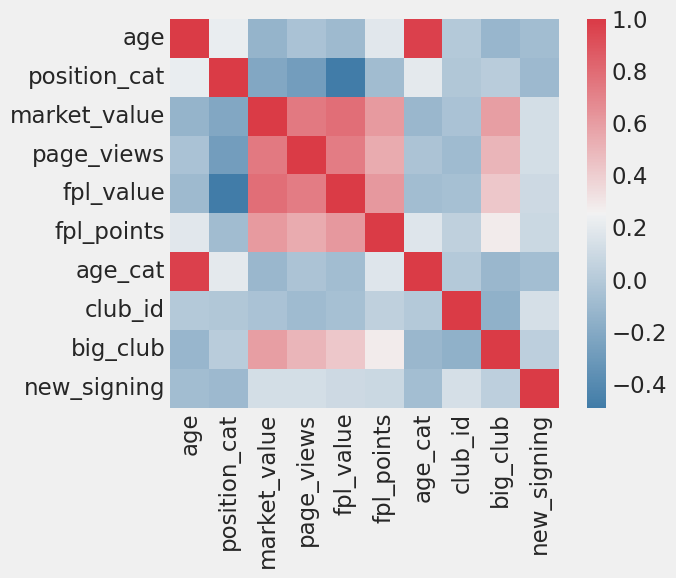

In [23]:
# Part a)
corr = correlation(football)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

Market Value vs Age
The age group of 22 to 29 have the most market value.


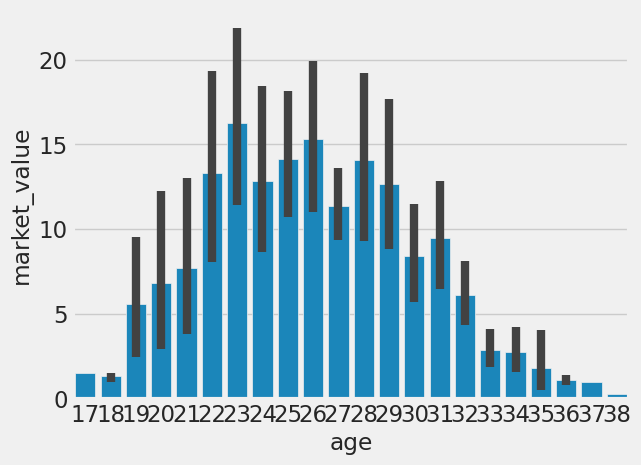

In [24]:
# Part b)
sns.barplot(data=football, x="age", y="market_value")
print('Market Value vs Age')
print('The age group of 22 to 29 have the most market value.')

Market Value vs Position Cat
The Position Cat 1 has the most market value.


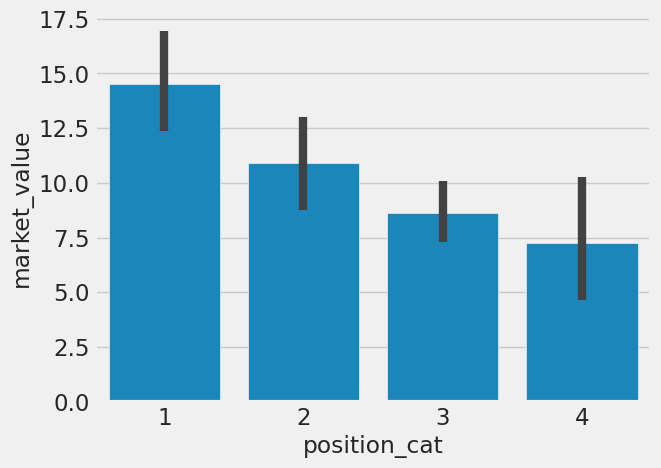

In [25]:
# Part c)
sns.barplot(data=football, x="position_cat", y="market_value")
print('Market Value vs Position Cat')
print('The Position Cat 1 has the most market value.')

Market Value vs Big Club
We see that the market value of players from the top 6 clubs is significantly higher than the other players.


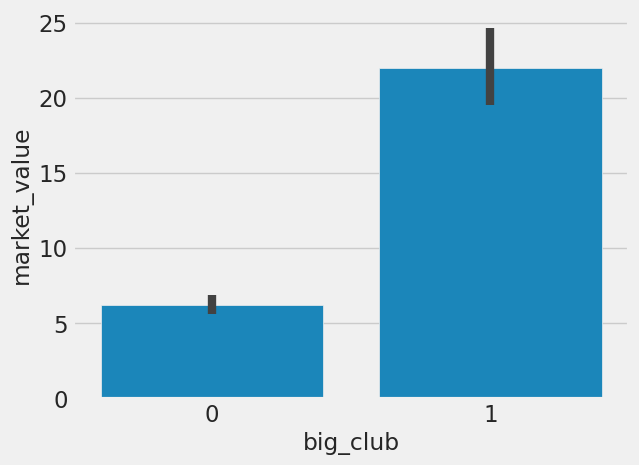

In [26]:
# Part d)
sns.barplot(data=football, x="big_club", y="market_value")
print('Market Value vs Big Club')
print('We see that the market value of players from the top 6 clubs is significantly higher than the other players.')

/tmp/ipython-input-113688319.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=80)


Market Value vs Club


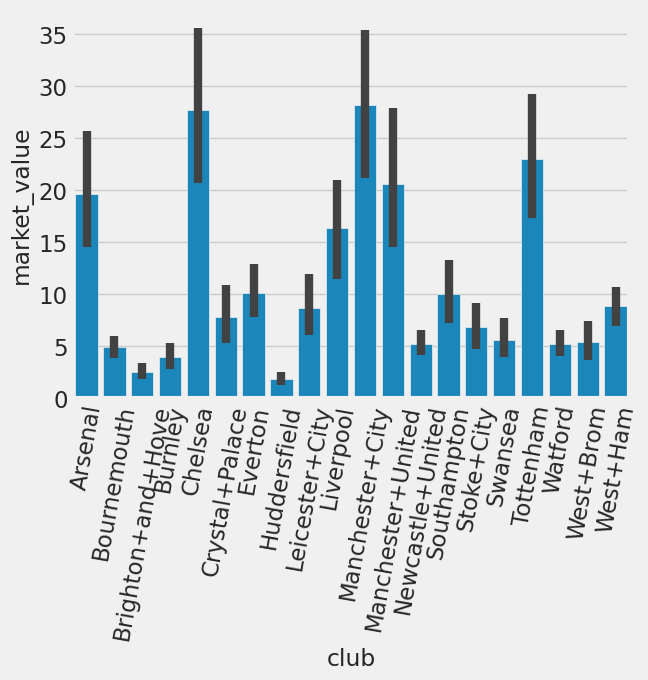

In [27]:
# Part e)
ax = sns.barplot(data=football, x="club", y="market_value")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
print('Market Value vs Club')

<Axes: xlabel='page_views', ylabel='market_value'>

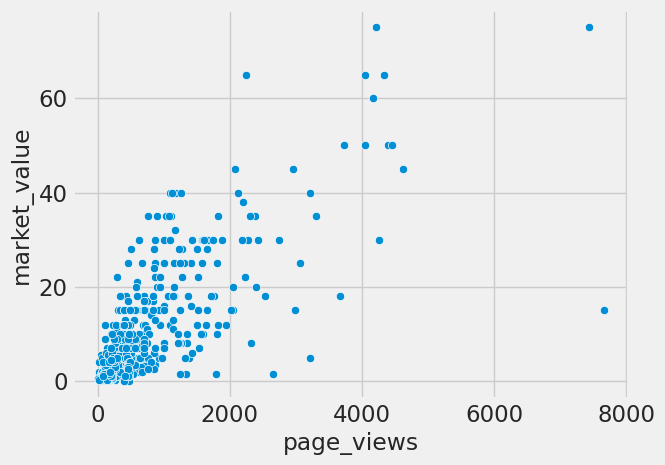

In [28]:
# Part f)
sns.scatterplot(data=football, x="page_views", y="market_value")

<!-- END QUESTION -->

### Training Validation Split
Now, split the data into train and test datasets. The training data is used to fit the model and test data is used to assess the performance of your model. Note that the seed is set to (random_state) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student. **Do not modify this in the following questions, as our tests depend on this random seed.**

In [29]:
x_train, x_test = train_test_split(football, test_size = 0.25, random_state= 42)
display(x_train)
display(x_test)

,club,age,position_cat,market_value,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing
104,Chelsea,26,2,50.0,4042,5.0,83,3,5,1,1
297,Newcastle+United,30,2,6.0,339,5.0,0,4,13,0,0
5,Arsenal,22,3,30.0,1675,6.0,119,2,1,1,0
116,Crystal+Palace,29,2,7.0,216,4.5,93,4,6,0,0
45,Bournemouth,20,2,6.0,243,4.5,17,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,Chelsea,23,1,25.0,1162,8.5,48,2,5,1,1
270,Manchester+United,19,1,18.0,3668,7.5,76,1,12,1,0
348,Stoke+City,24,4,15.0,402,5.0,20,2,15,0,0
435,West+Brom,18,1,1.5,169,4.5,12,1,19,0,0


,club,age,position_cat,market_value,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing
225,Liverpool,27,2,28.0,1236,5.5,73,3,10,1,0
30,Bournemouth,30,3,3.0,185,5.0,134,4,2,0,0
39,Bournemouth,30,1,2.0,140,5.0,64,4,2,0,0
222,Liverpool,23,2,15.0,1253,5.0,104,2,10,1,0
124,Crystal+Palace,24,3,8.0,385,5.0,47,2,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
437,West+Brom,34,4,1.5,100,4.0,0,6,19,0,0
249,Manchester+City,32,2,18.0,595,5.0,78,5,11,1,0
451,West+Ham,27,3,12.0,380,5.0,60,3,20,0,0
237,Liverpool,25,1,35.0,1117,9.0,0,3,10,1,0


Before moving forward, drop the column `club` from `football` dataframe.

In [30]:
# Dropping a column from the dataset
football = football.drop(columns=['club'])

In [31]:
response_variable = 'market_value'
train_reg, test_reg = train_test_split(football, test_size = 0.25, random_state= 42)
X_train_reg = train_reg[train_reg.columns[~train_reg.columns.isin([response_variable])]]
y_train_reg = train_reg[[response_variable]]
X_test_reg = test_reg[test_reg.columns[~ test_reg.columns.isin([response_variable])]]
y_test_reg = test_reg[[response_variable]]

### Question 7

Now that we have matrices, we can build a regression model with `scikit-learn`! Using the [`LinearRegression`] estimator, fit a regression model using `X_train_reg` and `y_train_reg`. Then, output the model's training accuracy below. You should get an training accuracy of around $0.74$ and test accuracy of around $0.80$.

In [32]:
reg_model = linear_model.LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

training_accuracy = reg_model.score(X_train_reg, y_train_reg)
test_accuracy = reg_model.score(X_test_reg, y_test_reg)

print ('Regression: R^2 score on training set', training_accuracy)
print ('Regression: R^2 score on test set', test_accuracy)

Regression: R^2 score on training set 0.7442609072567485
Regression: R^2 score on test set 0.8172256849191366


### Question 8

Create a dataframe of `y_test_reg` (actual), `predicted values` (predicted), and `residual`. Then create a `lmplot` (actualv vs predicted values).

<!-- BEGIN QUESTION -->



,actual,predicted,residual
0,28.0,16.930437,11.069563
1,3.0,9.422774,-6.422774
2,2.0,2.819085,-0.819085
3,15.0,17.647740,-2.647740
4,8.0,7.922377,0.077623


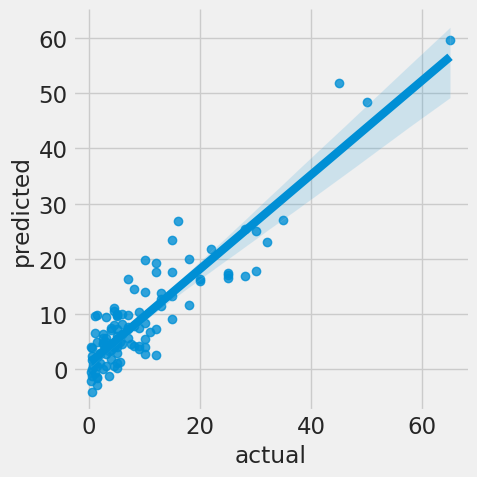

In [33]:
y_pred = reg_model.predict(X_test_reg)
y_pred_reshaped = y_pred.reshape(-1, 1)

residual_df = pd.DataFrame({
    "actual": y_test_reg.values.flatten(),
    "predicted": y_pred_reshaped.flatten()
})
residual_df["residual"] = residual_df["actual"] - residual_df["predicted"]

sns.lmplot(data=residual_df, x="actual", y="predicted")
residual_df.head()


<!-- END QUESTION -->

### Question 9

Also, calculate and print the Root Mean Square Error for the regression model fitted above.


<!-- BEGIN QUESTION -->



In [34]:
rmse = np.sqrt(np.mean((residual_df["actual"] - residual_df["predicted"]) ** 2))
print("Root Mean Square Error: ", rmse)

Root Mean Square Error:  4.546588244123758


<!-- END QUESTION -->

## Part 3: Spam/Ham Classification
### Feature Engineering, Logistic Regression, Cross Validation
In this part of the assignment, you will use what you've learned in class to fit a classifier that can distinguish spam (junk or commercial or bulk) emails from ham (non-spam) emails. In addition to providing some skeleton code to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook. This assignment section will cover the following concepts:

- Feature engineering with text data
- Using `sklearn` libraries to process data and fit classification models
- Validating the performance of your model and minimizing overfitting
- Generating and analyzing precision-recall curves
  
**Caution:**
This is a **real world** dataset – the emails you are trying to classify are actual spam and legitimate emails. As a result, some of the spam emails may be in poor taste or be considered inappropriate. The benefit of working with realistic data outweighs these innapropriate emails.

### Loading in the Data

In email classification, the goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email.

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the unlabeled test set contains 1000 unlabeled examples.

Run the following cells to load in the data into Dataframe.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails.

In [35]:
original_training_data = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/spam_data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/spam_data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


### Question 10a
First, let's check if our data contains any missing values. Fill in the cell below to print the number of NaN values in each column. If there are NaN values, replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns should be replaced with empty strings). Print the number of NaN values in each column after this modification to verify that there are no NaN values left.

Note that while there are no NaN values in the `spam` column, we should be careful when replacing NaN labels. Doing so without consideration may introduce significant bias into our model when fitting.

In [42]:
print('Before imputation:')
print(original_training_data.isnull().sum())
# fill in the missing values and update the original_training_data
original_training_data = original_training_data.fillna({"subject": "", "email": ""})
print('------------')
print('After imputation:')
print(original_training_data.isnull().sum())

Before imputation:
id         0
subject    0
email      0
spam       0
dtype: int64
------------
After imputation:
id         0
subject    0
email      0
spam       0
dtype: int64


### Question 10b

In the cell below, print the text of the `email` field for the first ham and the first spam email in the original training set.


In [43]:
first_ham = original_training_data.loc[original_training_data["spam"] == 0, "email"].iloc[0]
first_spam = original_training_data.loc[original_training_data["spam"] == 1, "email"].iloc[0]
print(first_ham)
print(first_spam)

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 



### Question 10c

Discuss one thing you notice that is different between the two emails that might relate to the identification of spam.

The Ham email looks like a normal informational message with a neutral tone. Where as the spam email is clearly promotional and has HTML formatting with a call to action link. Spam messages often has lots of marketing language and embedded links to persuade the reader to click, which makes those easierto spot as spam.

<!-- END QUESTION -->

### Training Validation Split
The training data downloaded is available for both training models and **validating** the models.  Therefore, you must it to separate training and validation datsets.  The **validation data** is used to assess the performance of your classifier once you are finished training. Note that the seed is set to (random_state) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student. **Do not modify this in the following questions, as our tests depend on this random seed.**

In [38]:
# This creates a 90/10 train-validation split on our labeled data

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

### Basic Feature Engineering

We would like to take the text of an email and predict whether the email is ham or spam. This is a *classification* problem, so we can use logistic regression to train a classifier. Recall that to train an logistic regression model we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$.  Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is an email. Each column of $X$ contains one feature for all the emails. We'll guide you through creating a simple feature, and you'll create more interesting ones as you try to increase the accuracy of your model.

### Question 11

Create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'],
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

In [52]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list): words to find
        texts (Series): strings to search in

    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.vstack([
        texts.str.contains(w, regex=False).astype(int).to_numpy()
        for w in words
    ]).T
    return indicator_array

We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature is itself a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.


In [53]:
from IPython.display import display, Markdown
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(Markdown("> Our Original DataFrame has a `type` column and some columns corresponding to words. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurences of the word in this sentence."))
display(df);
display(Markdown("> `melt` will turn columns into entries in a variable column. Notice how `word_1` and `word_2` become entries in `variable`; their values are stored in the value column."))
display(df.melt("type"))

> Our Original DataFrame has a `type` column and some columns corresponding to words. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurences of the word in this sentence.

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


> `melt` will turn columns into entries in a variable column. Notice how `word_1` and `word_2` become entries in `variable`; their values are stored in the value column.

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


### Question 12
Create a bar chart like the one above comparing the proportion of spam and ham emails containing certain words. Choose a set of words that are different from the ones above, but also have different proportions for the two classes. Please ensure to only consider emails from `train`.


<!-- BEGIN QUESTION -->



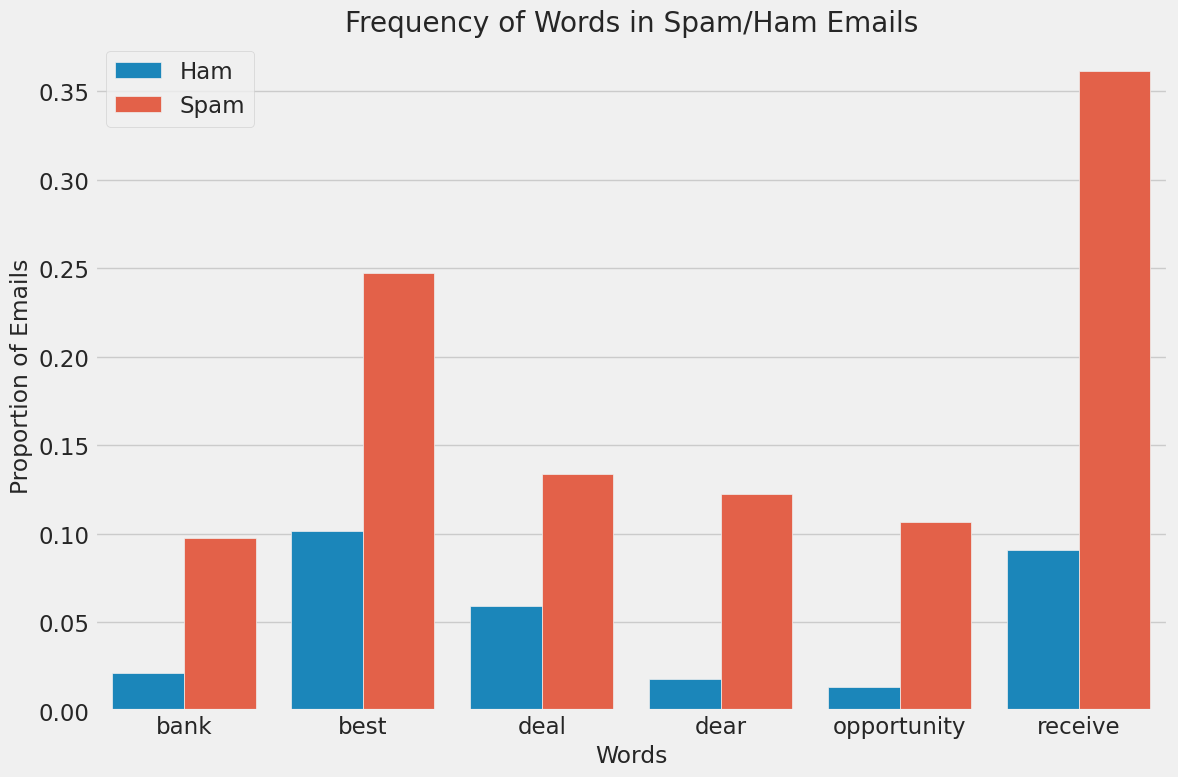

In [55]:
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts
some_words = ['opportunity', 'bank', 'receive', 'dear', 'best', 'deal']
Phi_train = words_in_texts(some_words, train ["email"])
df = pd.DataFrame(Phi_train, columns=some_words)
df['label'] = train['spam']

plt.figure(figsize=(12,8))
sns.barplot(x = "variable",
            y = "value",
            hue = "label",
            data = (df
                    .replace({'label':
                                {0 : 'Ham',
                                 1 : 'Spam'}})
                    .melt('label')
                    .groupby(['label', 'variable'])
                    .mean()
                    .reset_index()))

plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.legend(title = "")
plt.title("Frequency of Words in Spam/Ham Emails")
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

When the feature is binary, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes.

## Fit the classification model

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier!

### Question 13

You have given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `Y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`Y_train` should be a vector of the correct labels for each email in the training set.

In [57]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train["email"])
Y_train = train["spam"].to_numpy()

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]),
 array([0, 0, 0, 0, 0]))

### Question 14

Now that we have matrices, we can build a model with `scikit-learn`! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `Y_train`. Then, output the model's training accuracy below. You should get an accuracy of around $0.75$

In [62]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


### Evaluating the classification model

The classifier you made above isn't as good as the accuracy would make you believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure. Accuracy on the training set doesn't always translate to accuracy in the real world (on the test set). In future parts of this analysis, we will hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

To be clear, we label spam emails as 1 and ham emails as 0. These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam.

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam.

The two graphics below may help you understand precision and recall visually:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 15a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (feel free to hard code your answers for this part):

In [63]:
# give your hard coded answers below for the values of False Positives and False Negatives
zero_predictor_fp = 0
zero_predictor_fn = int((Y_train == 1).sum())
zero_predictor_fp, zero_predictor_fn

(0, 1918)

### Question 15b

What is the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

In [64]:
zero_predictor_acc = (Y_train == 0).sum() / len(Y_train)
zero_predictor_recall = 0.0
zero_predictor_acc, zero_predictor_recall

(np.float64(0.7447091707706642), 0.0)

### Question 15c

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Question 14. Do **NOT** use any `sklearn` functions.

In [65]:
pred = model.predict(X_train)

TP = ((pred == 1) & (Y_train == 1)).sum()
FP = ((pred == 1) & (Y_train == 0)).sum()
TN = ((pred == 0) & (Y_train == 0)).sum()
FN = ((pred == 0) & (Y_train == 1)).sum()

logistic_predictor_precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
logistic_predictor_recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0
logistic_predictor_far = FP / (FP + TN) if (FP + TN) != 0 else 0.0

logistic_predictor_precision, logistic_predictor_recall, logistic_predictor_far


(np.float64(0.6422287390029325),
 np.float64(0.11418143899895725),
 np.float64(0.021805183199285077))

### Question 15d

1. How does fitted model's prediction accuracy (number of correct predictions / total) is compared with predicting 0 for every email?
2. Given the word features given above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
3. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

1. The fitted LogisticRegression model has a slightly higher accuracy than the zero predictor. However, the model still performs poorly as a spam filter because its recall is very low, meaning it misses most spam messages.

2. One reason it performs poorly is that the words chosen are not prevalent enough across all emails. Many emails (spam and ham) may not contain these exact words, so teh feature matrix contains lots of zeros and the model has limited data to learn from.

3. Between the two calssifiers, I would prefer the LogisticRegression model for a spam filter beacuase the zero_predictor has recall = 0, meaning it catches no spam at all. The Logistic model at least catches some spam, so it filters spam sometimes without incorrectly flagging too many ham emails.

<!-- END QUESTION -->

